In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/dogs.csv')

In [3]:
data

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [4]:
feature_names = data.columns[1:]

In [5]:
feature_names

Index(['height', 'weight'], dtype='object')

In [6]:
X = data[feature_names]

In [7]:
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


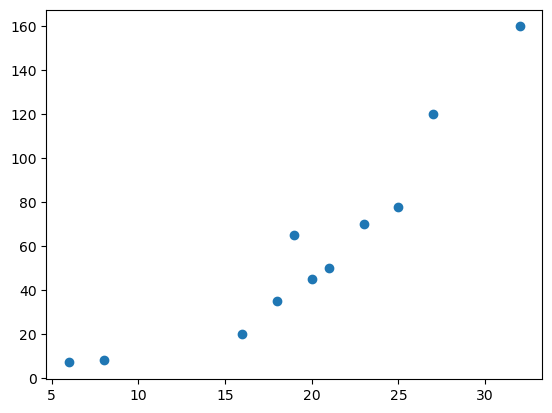

In [8]:
plt.scatter(X['height'], X['weight'])

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(X)

MinMaxScaler()

In [12]:
X = pd.DataFrame(scaler.transform(X), columns=feature_names)

In [13]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=2, n_init='auto')

In [16]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [17]:
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

In [18]:
kmeans.cluster_centers_

array([[0.65865385, 0.46323529],
       [0.15384615, 0.03050109]])

In [19]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)

In [20]:
centroids

,height,weight
0,0.658654,0.463235
1,0.153846,0.030501


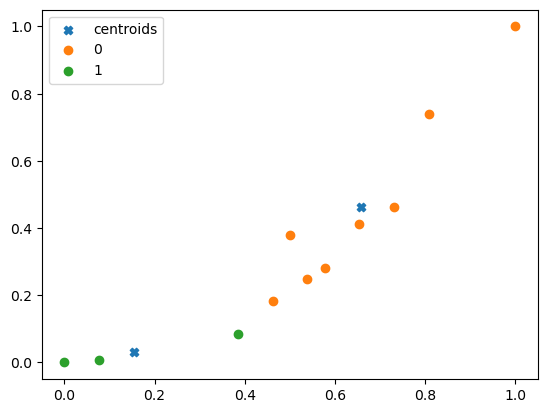

In [21]:
plt.scatter(centroids['height'], centroids['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.legend()
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, n_init='auto')

In [23]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [24]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)

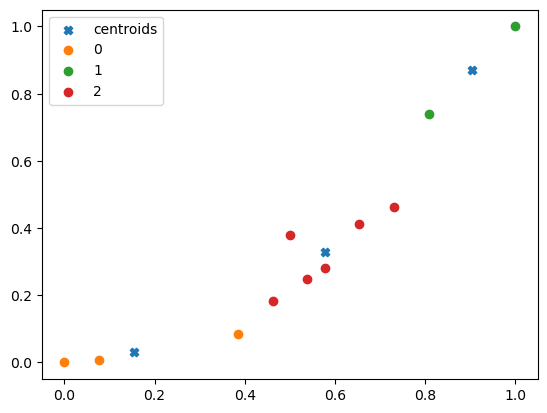

In [25]:
plt.scatter(centroids['height'], centroids['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [27]:
silhouette_values = silhouette_samples(X, kmeans.labels_)

In [28]:
silhouette_values

array([ 0.6518379 , -0.12082251,  0.34488062,  0.31571159,  0.66934763,
        0.43214632,  0.65475756,  0.59212209,  0.71054885,  0.65608086,
        0.64642109])

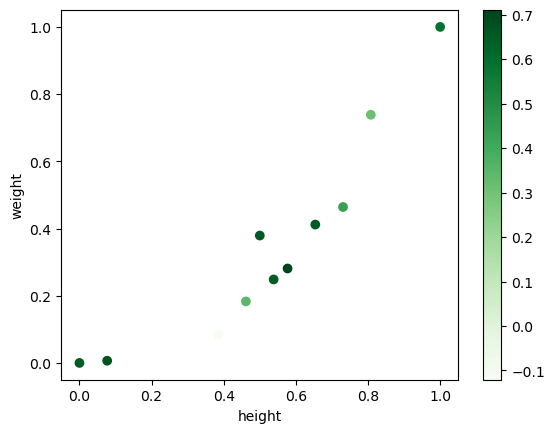

In [31]:
plt.scatter(X['height'], X['weight'], c=silhouette_values, cmap='Greens')
plt.colorbar()
plt.xlabel('height')
plt.ylabel('weight')
plt.show()